# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units='metric'
query_url=f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Append the City information into city_data list
        response = requests.get(query_url+city).json()
        city_data.append(response['name'])
        city_clouds.append(response['clouds']['all'])
        city_country.append(response['sys']['country'])
        city_date.append(response['dt'])
        city_humidity.append(response['main']['humidity'])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        city_max_temp.append(response['main']['temp_max'])
        city_wind.append(response['wind']['speed'])

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | sola
Processing Record 3 of Set 1 | ryotsu-minato
Processing Record 4 of Set 1 | la sarre
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | maloye ganyushkino
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | greenville
Processing Record 15 of Set 1 | mukalla
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | klyuchi
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | zouerate
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | isafjordur
Processing Record 2

In [35]:
#Convert the cities weather data into a Pandas DataFrame
city_data_= {            "City": city_data, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}


city_data_df = pd.DataFrame(city_data_)

# # # Show Record Count
city_data_df.count()



City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,26.47,69,75,6.69,US,1686601632
1,Sola,-13.8833,167.5500,27.09,75,82,6.26,VU,1686601329
2,Ryōtsu-minato,38.0833,138.4333,20.40,86,86,0.54,JP,1686601895
3,La Sarre,48.8002,-79.1996,20.77,64,100,3.36,CA,1686601641
4,Lompoc,34.6391,-120.4579,22.05,77,100,3.09,US,1686601871


In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/dennysurdiales/Desktop/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("/Users/dennysurdiales/Desktop/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bethel,41.3712,-73.4140,26.47,69,75,6.69,US,1686601632
1,Sola,-13.8833,167.5500,27.09,75,82,6.26,VU,1686601329
2,Ryōtsu-minato,38.0833,138.4333,20.40,86,86,0.54,JP,1686601895
3,La Sarre,48.8002,-79.1996,20.77,64,100,3.36,CA,1686601641
4,Lompoc,34.6391,-120.4579,22.05,77,100,3.09,US,1686601871


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

/var/folders/2w/0qcqt7q9047crv2q3jqrb4nm0000gn/T/ipykernel_6938/1099249709.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Max Latitude vs. Temperature' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


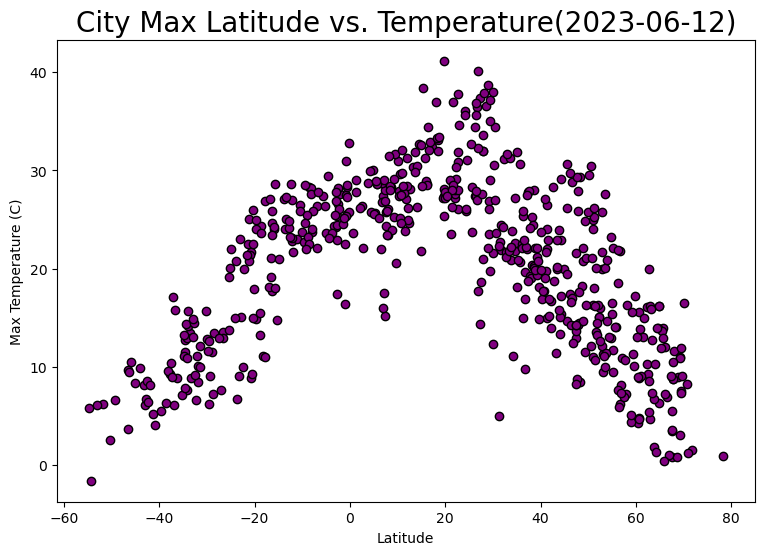

In [39]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df ['Max Temp'], marker='o', edgecolors='black', color='purple')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# Save the figure
plt.savefig("/Users/dennysurdiales/Desktop/python-api-challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

/var/folders/2w/0qcqt7q9047crv2q3jqrb4nm0000gn/T/ipykernel_6938/3828799970.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Temperature' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


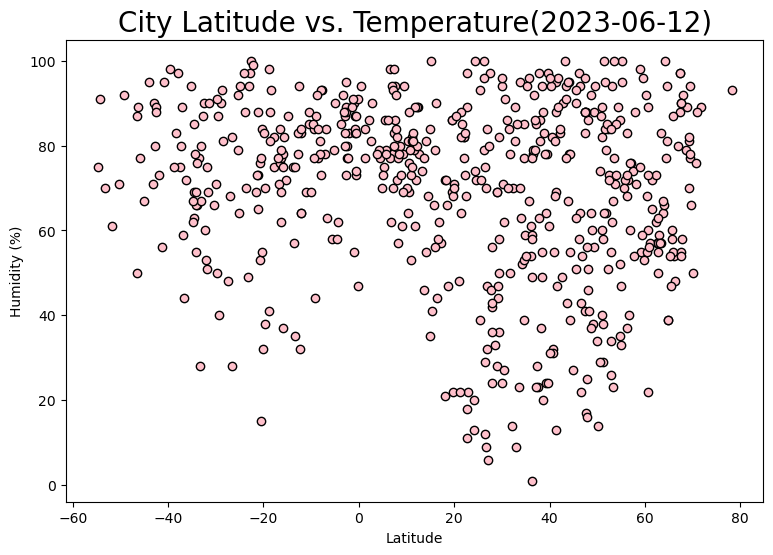

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', color='pink')

# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# Save the figure
plt.savefig("/Users/dennysurdiales/Desktop/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

/var/folders/2w/0qcqt7q9047crv2q3jqrb4nm0000gn/T/ipykernel_6938/3999100506.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Cloudiness' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


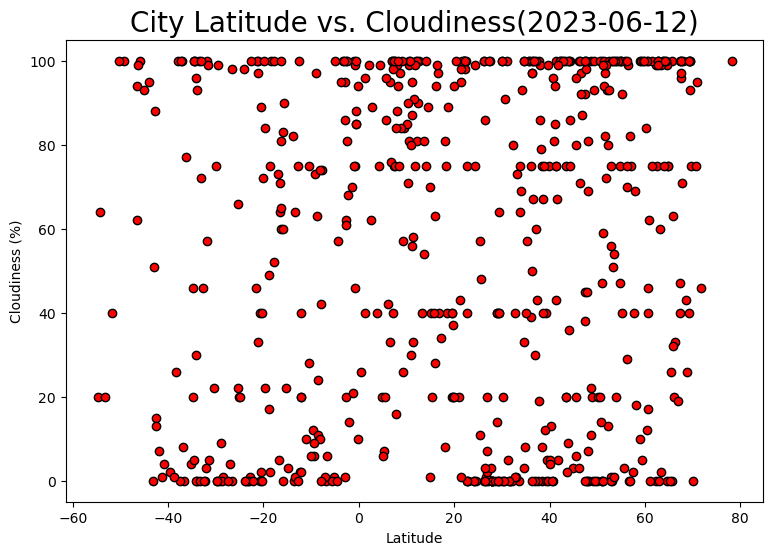

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df ['Cloudiness'], marker='o', edgecolors='black', color='red')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Save the figure
plt.savefig("/Users/dennysurdiales/Desktop/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

/var/folders/2w/0qcqt7q9047crv2q3jqrb4nm0000gn/T/ipykernel_6938/797782069.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Wind Speed' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


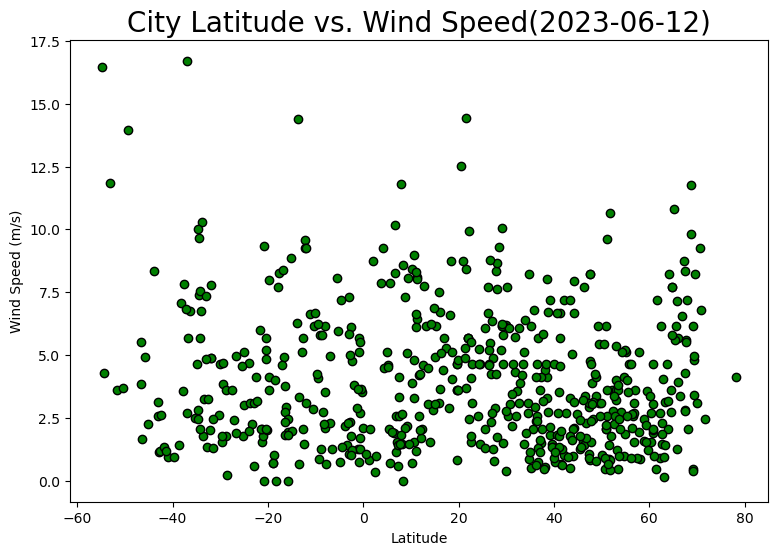

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df ['Wind Speed'], marker='o', edgecolors='black', color='green')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
# Save the figure
plt.savefig("/Users/dennysurdiales/Desktop/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bethel,41.3712,-73.4140,26.47,69,75,6.69,US,1686601632
1,Sola,-13.8833,167.5500,27.09,75,82,6.26,VU,1686601329
2,Ryōtsu-minato,38.0833,138.4333,20.40,86,86,0.54,JP,1686601895
3,La Sarre,48.8002,-79.1996,20.77,64,100,3.36,CA,1686601641
4,Lompoc,34.6391,-120.4579,22.05,77,100,3.09,US,1686601871
...,...,...,...,...,...,...,...,...,...
584,Santa Ana,33.7456,-117.8678,22.16,70,75,5.14,US,1686601350
585,Den Helder,52.9599,4.7593,21.66,84,56,5.36,NL,1686602040
586,Port Lincoln,-34.7333,135.8667,13.23,67,46,10.02,AU,1686602040


In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bethel,41.3712,-73.4140,26.47,69,75,6.69,US,1686601632
2,Ryōtsu-minato,38.0833,138.4333,20.40,86,86,0.54,JP,1686601895
3,La Sarre,48.8002,-79.1996,20.77,64,100,3.36,CA,1686601641
4,Lompoc,34.6391,-120.4579,22.05,77,100,3.09,US,1686601871
5,Cabo San Lucas,22.8909,-109.9124,34.61,22,0,3.09,MX,1686601380


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(city_data_df[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Sola,-13.8833,167.5500,27.09,75,82,6.26,VU,1686601329
6,Ushuaia,-54.8000,-68.3000,5.79,75,20,16.46,AR,1686601896
7,Blackmans Bay,-43.0167,147.3167,6.07,90,51,3.14,AU,1686601896
8,Adamstown,-25.0660,-130.1015,20.02,64,20,3.01,PN,1686601602
14,Waitangi,-43.9535,-176.5597,9.90,95,95,8.33,NZ,1686601898


###  Temperature vs. Latitude Linear Regression Plot

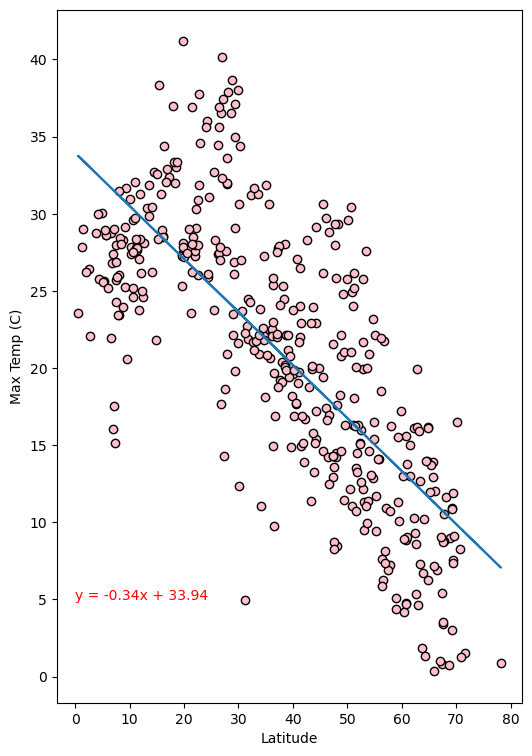

the r value is 0.5591254914


In [70]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(6,9))

x_axis= northern_hemi_df['Lat']
y_axis=northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)


regression= x_axis * slope + intercept

#y=mx+b
line_equation= 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_axis,y_axis,marker='o', edgecolors='black', color='pink')
plt.plot(x_axis,regression,"-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.annotate(line_equation, (0,5),color="red")
plt.show()
print(f"the r value is {round(rvalue**2,10)}")

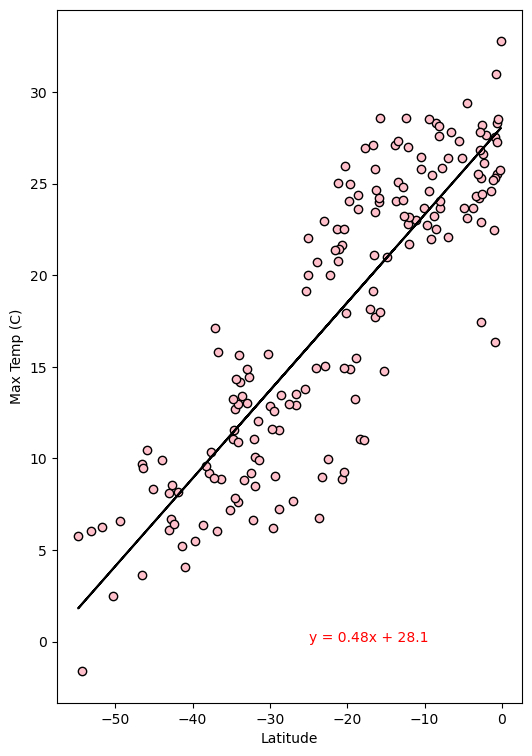

the r value is 0.7547852341


In [69]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(6,9))

x_axis= southern_hemi_df['Lat']
y_axis=southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)


regression= x_axis * slope + intercept

#y=mx+b
line_equation= 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_axis,y_axis,marker='o', edgecolors='black', color='pink')
plt.plot(x_axis,regression,"-", color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.annotate(line_equation, (-25,0),color="Red")
plt.show()
print(f"the r value is {round(rvalue**2,10)}")

The northern hemisphere regression is poor when comparing City Max Latitude vs. the Temperature and the southern hemisphere regression is fair. Northern Hemisphere has a strong negative relationship. Sourthern Hemisphere has a strong positive relationship.

### Humidity vs. Latitude Linear Regression Plot

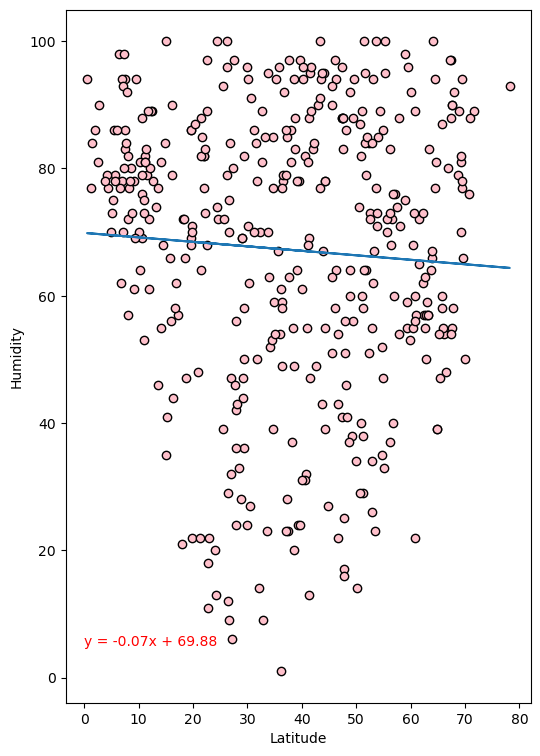

the r value is 0.0035642715


In [71]:
# Northern Hemisphere
plt.figure(figsize=(6,9))

x_axis= northern_hemi_df['Lat']
y_axis=northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)


regression= x_axis * slope + intercept

#y=mx+b
line_equation= 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_axis,y_axis,marker='o', edgecolors='black', color='pink')
plt.plot(x_axis,regression,"-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_equation, (0,5),color="red")
plt.show()
print(f"the r value is {round(rvalue**2,10)}")

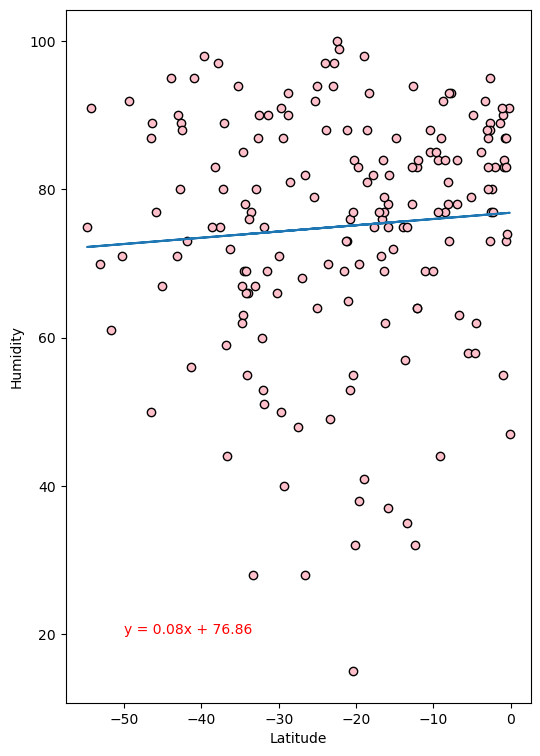

the r value is 0.0054429857


In [60]:
# Southern Hemisphere
plt.figure(figsize=(6,9))

x_axis= southern_hemi_df['Lat']
y_axis=southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)


regression= x_axis * slope + intercept

#y=mx+b
line_equation= 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_axis,y_axis,marker='o', edgecolors='black', color='pink')
plt.plot(x_axis,regression,"-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_equation, (-50,20),color="red")
plt.show()
print(f"the r value is {round(rvalue**2,10)}")

When Comparing the humidty of the northern and southern hemisphere vs the latitude, the regression is very poor. There is no relationship correlation between the humidity and the latitude of the northern and southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

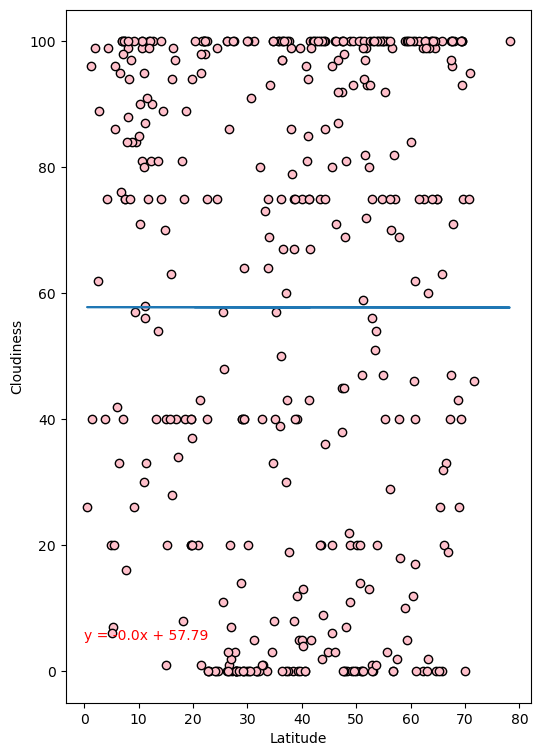

the r value is 1.954e-07


In [61]:
# Northern Hemisphere
plt.figure(figsize=(6,9))

x_axis= northern_hemi_df['Lat']
y_axis=northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)


regression= x_axis * slope + intercept

#y=mx+b
line_equation= 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_axis,y_axis,marker='o', edgecolors='black', color="pink")
plt.plot(x_axis,regression,"-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_equation, (0,5),color="red", size=10)
plt.show()
print(f"the r value is {round(rvalue**2,10)}")

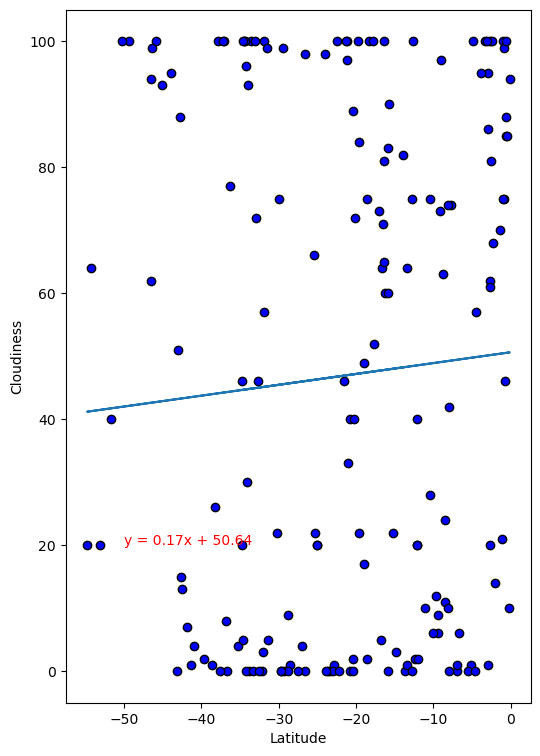

the r value is 0.0037866201


In [62]:
# Southern Hemisphere
plt.figure(figsize=(6,9))

x_axis= southern_hemi_df['Lat']
y_axis=southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)


regression= x_axis * slope + intercept

#y=mx+b
line_equation= 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_axis,y_axis,marker='o', edgecolors='black', color="blue")
plt.plot(x_axis,regression,"-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_equation, (-50,20),color="red", size=10)
plt.show()
print(f"the r value is {round(rvalue**2,10)}")

When comparing the northern and southern hemisphere cloudiness with the latitude the regression is very poor. There is no relationship correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

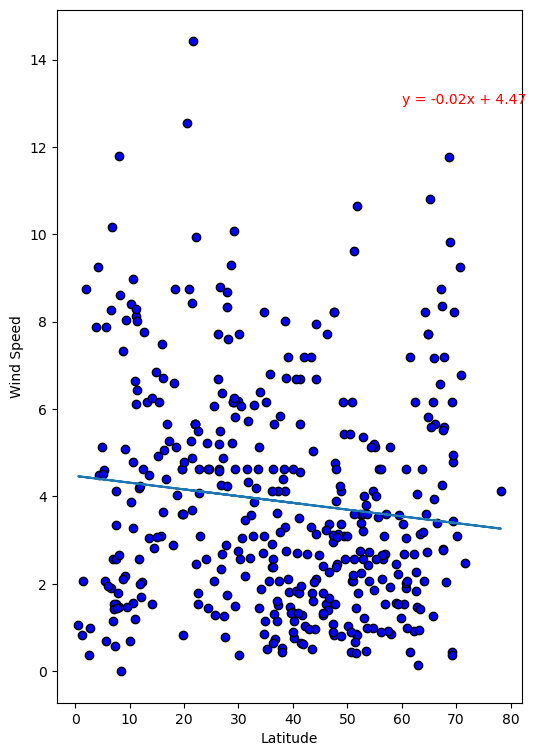

the r value is 0.0132375335


In [64]:
# Northern Hemisphere
plt.figure(figsize=(6,9))

x_axis= northern_hemi_df['Lat']
y_axis=northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)


regression= x_axis * slope + intercept

#y=mx+b
line_equation= 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_axis,y_axis,marker='o', edgecolors='black', color="blue")
plt.plot(x_axis,regression,"-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_equation, (60,13),color="red", size=10)
plt.show()
print(f"the r value is {round(rvalue**2,10)}")

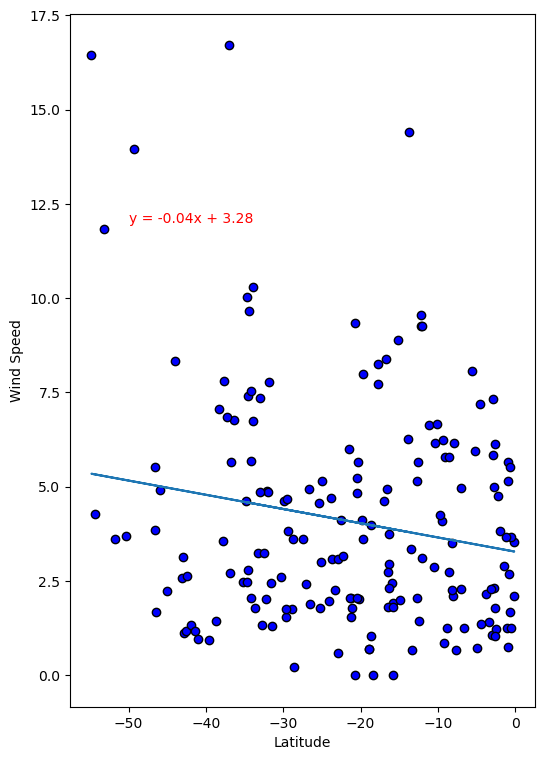

the r value is 0.0316900226


In [65]:
# Southern Hemisphere
plt.figure(figsize=(6,9))

x_axis= southern_hemi_df['Lat']
y_axis=southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)


regression= x_axis * slope + intercept

#y=mx+b
line_equation= 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_axis,y_axis,marker='o', edgecolors='black', color="blue")
plt.plot(x_axis,regression,"-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_equation, (-50,12),color="red", size=10)
plt.show()
print(f"the r value is {round(rvalue**2,10)}")

When comparing the northern and southern hemisphere Wind Speed with the latitude, the regression value is poor. There is a low relationship correlation between the wind speed and latitude for both the northern and southern hemisphere.